# Résolution numérique d’équations différentielles

> <font size='3'>**En fin de séance, rendre le fichier source Jupiter Notebook *(.ipynb)* de votre TP obtenu <span style="color:red">après les 3 heures</span> de travail.**<br><br>
**Rendre précisément <span style="color:red">une semaines après</span> la séance de TP le fichier source final comportant les reponses aux questions et les calculs demandés.**<br><br>
L'objectif de la seance est d'étudier des **méthodes numériques** permettant obtenir des solutions d’équations différentielles. <br><br>
Vous allez comparer les solutions théoriques obtenues à l'aide des notions vu en CM avec les solutions qu'on peut obtenir à l'aide de ces méthodes.<br><br>
Par ailleurs vous allez apprendre la redaction des formules mathématiques en $\LaTeX$ pour écrire vos réponses aux questions ci-dessous (un petit manuel est disponible sur moodle pour vous aider).</font>

## Exercice 1. Modèle de croissance (équations différentielles appliquées à la biologie)

Nous allons d'abord étudier une équation du premier ordre et **la méthode d'Euler** pour construire la solution numérique. 

Il existe de nombreux modèles de croissance. Considérons par exemple le modèle suivant :
$$
N^{\prime}=(2-\alpha\cos(t)) N - F(N) \quad\quad\quad \textbf{(1)}
$$
où

- $N(t)$ : effectif de la population en fonction du temps $t$;


- $(2-\alpha\cos (t))$ : taux de naissance avec variations saisonnières, coefficient $\alpha$ (alpha) est constant ;


- $\displaystyle F(N) = \frac{\beta}{2} N^2$ : terme de surpopulation qui depend de la solution elle même, coefficient $\beta$ (beta) etant constant ;

Comme $F$ est une fonction de $N$, cette équation est dite non linéaire. En général, on ne peut pas toujours construire explicitement une solution à une équation non linéaire. D'où l'utilité des méthodes numériques.

Dans le cas $F(N) = 0$ on obtient une équation homogène à coefficients variables, contrairement aux exemples étudiés en CM. Cela rend plus difficile la résolution du problème.

### Travail à realiser

1. Montrer que dans le cas homogène $F(N) = 0$ la solution de **(1)** est donné par 
$$y(x) = K \exp(2t - \alpha \sin t), \quad K = const$$
Vous expliciterez vos calculs dans la cellule ci-dessous<br>
(rediger votre reponse en $\LaTeX$; **cette reponse est obligatoire pour le rendu dans une semaine**).<br>*Indication. Reecrire l'equation sous la forme (il faut justifier pourquoi $y$ ne s’annule pas quand on divise)$$\frac{y^{\prime}}{y}=a(t),$$et intégrer les deux cotés.*

> 1. **Votre réponse ici. (Double-cliquer ici pour modifier le contenu)**  <br>
Pour verifier que $y(x)$ est une solution on fait le calcul ...

2. Etudier l'exemple d'utilisation de la méthode **plt.plot** pour tracer les fonctions. Dans l'exemple nombre des points dans le tableau $x$ est imposé à 1000, quel est le nombre minimal pour avoir un graphique toujours bien presenté? (vous changerez la valeur dans l'exemple.)<br>
Définir une autre fonction périodique et représentez-la graphiquement pour deux périodes.

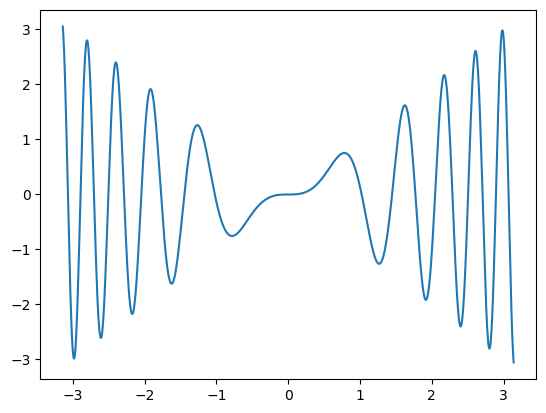

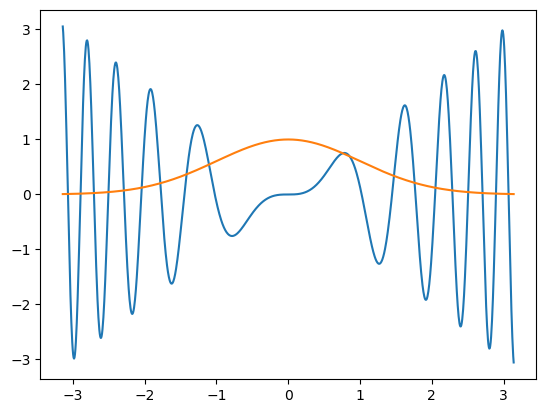

In [1]:
# En python, on commence toujours par importer les bibliothèques nécessaires
# la bibliothèque matplotlib.pyplot est utilisée pour tracer des fonctions
# la bibliothèque numpy permet de travailler efficacement avec des tableaux 
#                           et est souvent utilisée pour les calculs scientifiques.


import matplotlib.pyplot as plt 
import numpy as np
import math as math

# les instructions ci-dessous permettent de definir des focntions f1 et f2 d'un argument x
# l'utilisation de np.sin et np.exp (méthodes de la bibliothèque numpy) permet
#                                  d'utiliser ces fonctions même dans le cas où x est un tableau

def f1(x):
    return x*np.sin(3*x**2)

def f2(x):
    return np.exp(-x**2/2)
    
# la commande np.linspace permet de créer un tableau de 1000 points equirepartis entre -pi et pi
x = np.linspace(-math.pi,math.pi,1000)
# la ligne ci-dessous permet de créer un tableau y avec des valeurs de la fonction f1
y = f1(x)

# méthode plt.plot() pour tracer les points (x, y)
plt.plot(x,y)
# plt.show() pour afficher le graphique
plt.show()

# on peut utiliser f1 et f2 directiment quand on appele la méthode plt.plot
plt.plot(x,f1(x))
plt.plot(x,f2(x))
# si maintenant on appelle plt.show() juste après, on pour afficher les deux graphiques ensemble
# ils sont automatiquement de couleurs différentes
plt.show()

3. Revenons à notre équation : modifiez l'exemple ci-dessus pour représenter graphiquement une solution de l'équation homogène de la question 1.

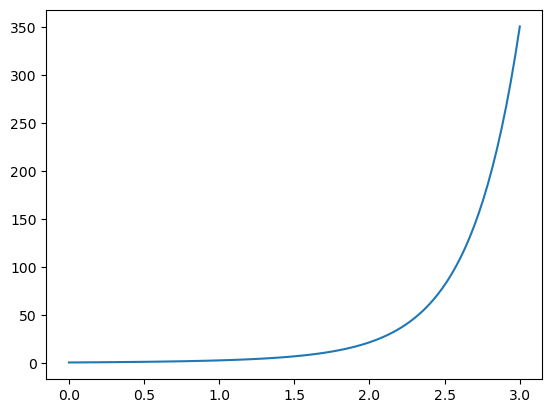

In [2]:
# Graphique d'une solution de l'equation homogène 

def Nh(t):
    return

def yHm(t, C, alp):
    return C*np.exp(2*t-alp*np.sin(t))

# t = ..
# y = ...
# plt.plot(...)

t = np.linspace(0,3,100)
plt.plot(t, yHm(t, 1, 1))

4. On passe maintenant à la résolution numérique de l'equation **(1)**. Pour cela on va utiliser **la méthode d'Euler**.
La méthode d'Euler permet d'obtenir une solution approchée de l'équation différentielle
$$
\left\{\begin{array}{l}
y^{\prime}=f(x, y), \\
y\left(x_0\right)=y_0
\end{array}\right.
$$
Il est à noter que $y_0$ est connue; Ici, $f$ désigne une fonction de deux variables à valeurs réelles, c'est à dire
$$
\begin{aligned}
& f: \mathbb{R} \times \mathbb{R} \rightarrow \mathbb{R}, \\
& (x, y) \mapsto f(x, y) .
\end{aligned}
$$
Pour l'équation **(1)** on a $\displaystyle f(t, N(t)) = (2 - \alpha\cos(t))N(t) - \frac{\beta}{2}N(t)$. 
On fixe un pas d'itération $h$ et on définit
$$
t_j=t_0+j h, \quad j= 0\ldots M.
$$
Les valeurs approchées $N_j$ de $N(t_j)$ sont définies itérativement en posant
$$
N_{j+1}=N_j+h f\left(t_j, N_j\right). \quad\quad\quad\textbf{(2)}
$$
Completer l'algortithme python ci-dessous pour le calcul des M itérations de la suite $(N_j)$ définie à l’aide de la méthode d’Euler avec un pas $h$ et donné $N_0$ ($t_0=0$) qu'on pourrait modifier à notre convenance. 

In [3]:
# méthode d'Euler de resolution de (1)

# def Euler(h, N0, M, alp, beta ):
#    N = np.zeros(M)
#    t = np.zeros(M)
#    N[0] = ...
#    t[0] = 0
#    for j in ...
#        N[j+1] = N[j] + ...
#        t[j+1] = t[j] + h
#    return N, t


def Euler(h, N0, M, alp, beta):
    N = np.zeros(M)
    t = np.zeros(M)
    t[0] = 0
    N[0] = N0
    for j in range(M-1):
        N[j+1] = N[j] + h * ( (2 - alp*math.cos(t[j]))*N[j] - 0.5*beta*N[j]**2 )
        t[j+1] = (j+1)*h
    return N, t

5. Comparer les valeurs correspondantes à la solution exacte obtenue à la question 1 (choisissez vos paramètres avec soin !) et les valeurs calculées graphiquement. 

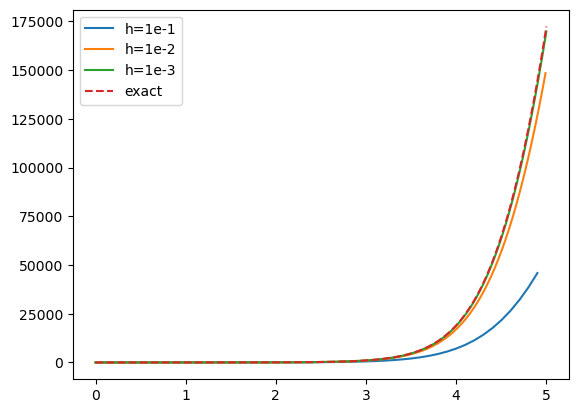

In [4]:
# plt.plot() ...

Nt0 = 3
alp = 1
beta = 0


h1 = 0.1
N1, t1 = Euler(h1, Nt0, 50, alp, beta)
plt.plot(t1, N1,label = 'h=1e-1')


h2 = 0.01
N2, t2 = Euler(h2, Nt0, 500, alp, beta)
plt.plot(t2, N2,label = 'h=1e-2')


h3 = 0.001
N3, t3 = Euler(h3, Nt0, 5000, alp, beta)
plt.plot(t3, N3, label = 'h=1e-3')

tex = np.linspace(0, 5, 200)
plt.plot(tex, yHm(tex, Nt0, alp),'--',label = 'exact')
plt.legend()
plt.show()

6. Changer les valeurs de pas $h$ et étudier son influence sur les résultats. Commenter

> 6. **Votre réponse ici. (Double-cliquer ici pour modifier le contenu)**  <br>

7. Que pouvez vous dire de comportement de la solution dans le cas homogène? Que se passe-t-il avec la population?

> 7. **Votre réponse ici. (Double-cliquer ici pour modifier le contenu)**

8. Construire maintenant une solution pour le cas $\beta \neq 0$. Commenter le résultat. 

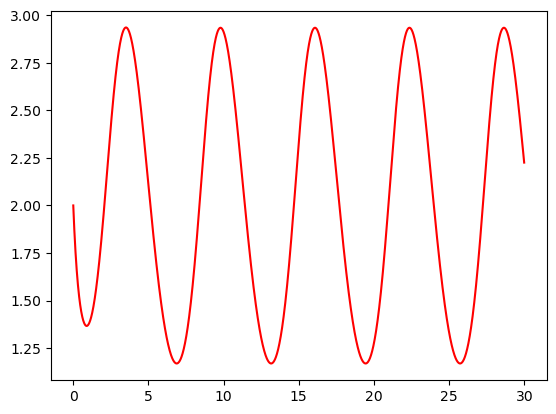

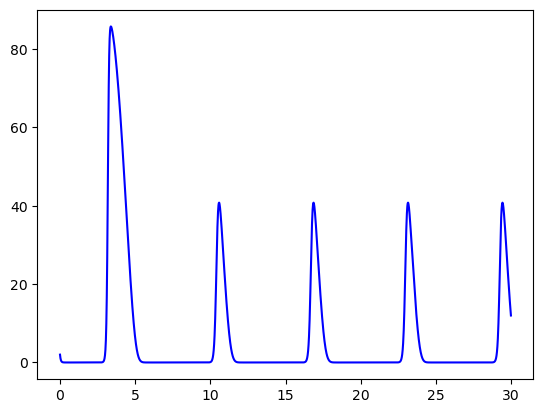

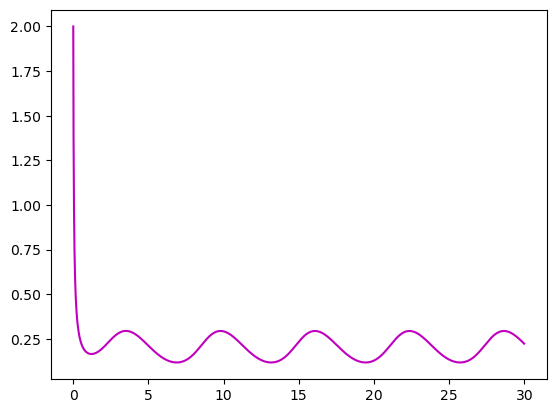

In [5]:
N, t = Euler(0.01, 2.0, 3000, 1.0, 2.0)
plt.plot(t, N,'r')
plt.show()
N, t = Euler(0.01, 2.0, 3000, 20.0, 0.5)
plt.plot(t, N,'b')
plt.show()
N, t = Euler(0.01, 2.0, 3000, 1.0, 20.0)
plt.plot(t, N,'m')

### Exercice 2. Régimes d'évolution d'oscillateurs libres amorties

On sait dèja que le mouvement d'un pendule se decrit par l'équation de second ordre. On considère l'équation suivante qui permet de prendre en compte l'amortissement :

$$
y''(t) + 2 \gamma y'(t) + \omega_0^2 y(t) = 0\quad\quad\quad\textbf{(3)}
$$

$\gamma>0$ correspond à l’amortissement, $\omega_0>0$ correspond à la fréquence propre.

1. Donner la forme des solutions de l’équation différentielle ci-dessus. On distinguera trois cas de figure selon la valeur de $\Delta = 4(\gamma^2 - \omega_0^2)$<br> (Vous pouvez revenir sur l'exercice 2 de TD 1, seulement ici on va considerer les solutions réelles directement.)

> 1. **Votre réponse ici. (Rediger votre reponse en $\LaTeX$)**

La méthode d'Euler peut également être utilisée pour résoudre des équations du second ordre si l'on peut les réduire à un système de deux équations du premier ordre auxquelles on applique la méthode comme dans l'exercice précédent. 


Notamment pour une équation avec les données $y_0$, $z_0$

$$
\begin{array}{c}
y''(t) + f(t,y(t),y'(t)) = 0,\\
y(0) = y_0,\quad y'(0) = z_0
\end{array}
$$

on introduit $z(t) = y'(t)$ et on obtient un système

$$
\left\{
\begin{array}{l}
y'(t) = z(t),\\
\displaystyle z'(t) = -f(t,y(t),z(t)),\\
y(0) = y_0,\\ 
z(0) = z_0.
\end{array}
\right.
$$

On fixe encore un pas d'itération $h$ et on définit
$$
t_j=t_0+j h, \quad j= 0\ldots M.
$$
$t_0$ est une donnée, dans notre cas definie par $t=0$, et la méthode d'Euler s'ecrit 

$$
\left\{
\begin{array}{l}
y_{j+1}=y_j+h z_j,\\
\displaystyle z_{j+1} = z_j - h f(x_j,y_j,z_j),
\end{array}
\right.
$$
où on itialise les suites $(y_j)_j$ et $(z_j)_j$ par les données $y_0$, $z_0$ respectivement.

2. Écrire explicitement la méthode d'Euler appliquée à l'équation **(3)**. Mettre d'abord l'équation **(3)** sous forme d'un système, expliciter ensuite la méthode pour les itérés des valeurs approchées de $y(x_j)$ et $y'(x_j)$.

> 2. **Votre réponse ici. (Rediger votre reponse en $\LaTeX$)**

3. Implementer l'algorithme python pour la methode d'Euler pour la résolution de **(3)** en adoptant votre méthode de la question 4 de l'exercice précédente.

In [6]:
def EulerP(h, y0, yp0, M, g, w0):
    x = np.zeros(M)
    y = np.zeros(M)
    z = np.zeros(M)
    x[0] = 0
    y[0] = y0
    z[0] = yp0
    for j in range(M-1):
        z[j+1] = z[j] + h * (-2*g*z[j] - w0**2*y[j])
        y[j+1] = y[j] + h * z[j]
        x[j+1] = (j+1)*h
    return y, x

On distingue quatre régimes possibles pour ce système physique

i. Régime apériodique: $\Delta > 0$. On dit que ce sont des solutions amorties ou surcritiques, il n’y a pas d’oscillation autour de l’axe des abscisses.

ii. Régime apériodique critique: $\Delta = 0$. On dit que ce sont des solutions amorties critiques, il n’y a pas d’oscillation autour de l’axe des abscisses.

iii. Régime pseudo-périodique ou pseudo-critique: $\Delta < 0$ (si $\gamma \neq 0$). Il y a donc des oscillations autour de l’axe des abscisses de moins en moins grande.

iv. Si $\Delta < 0$ et $\gamma = 0$ le régime est dit harmonique. Il s'agit d'un régime théorique (exemple considéré dans le CM), car normalement, dans tout système physique, il y a des pertes d'énergie (frottement).

4. Choisissez bien les valeurs des paramètres et representer le deplacement $y(x)$ obtenu numériquement à l'aide de votre algorithme d'Euler pour tous les régimes possibles.  

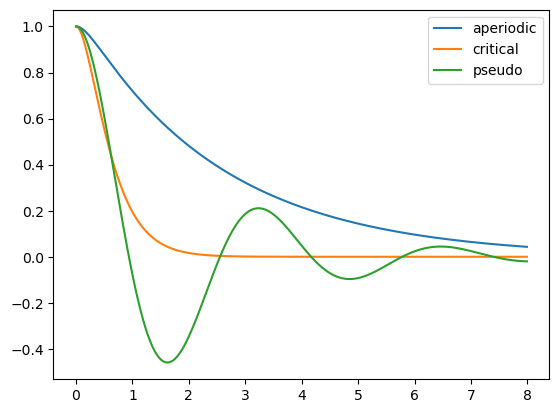

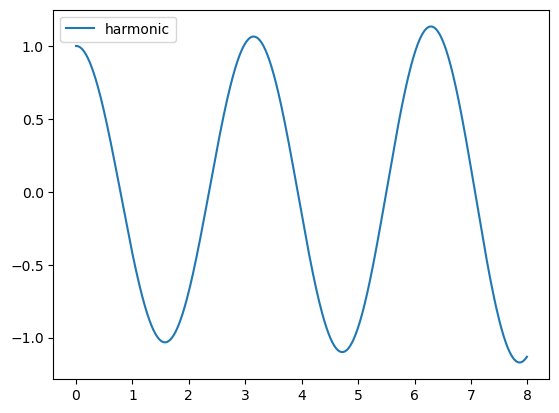

In [7]:
h = 0.01
y0 = 1.0
yp0 = 0.0
M = 800

Y1, t = EulerP(h, y0, yp0, M, 3.0, 1.5)
Y2, t = EulerP(h, y0, yp0, M, 3.0, 3.0)
Y3, t = EulerP(h, y0, yp0, M, 0.5, 2.0)
Y4, t = EulerP(h, y0, yp0, M, 0.0, 2.0)

plt.plot(t, Y1, label = 'aperiodic')
plt.plot(t, Y2, label = 'critical')
plt.plot(t, Y3, label = 'pseudo')
plt.legend()
plt.show()

plt.plot(t, Y4, label = 'harmonic')
plt.legend()
plt.show()

5. On se concetre maintenant sur le cas de régime harmonique $\gamma = 0$. Représentez sur le même graphique la solution exacte et la solution obtenue à l'aide de votre méthode numérique. Faites varier la valeur de h d'un petit pas à un grand pas. Commentez les résultats observés. Vous allez observer des problèmes liés aux propriétés de la méthode d'Euler (et en particulier à sa stabilité).

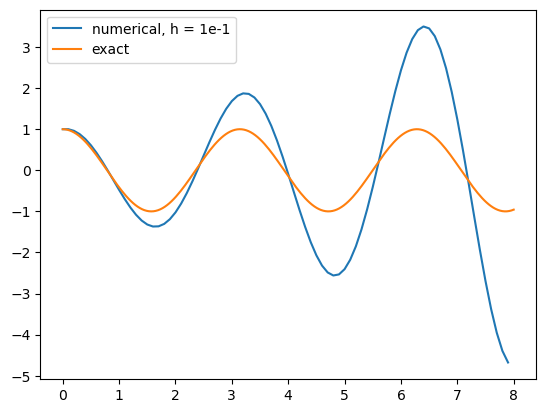

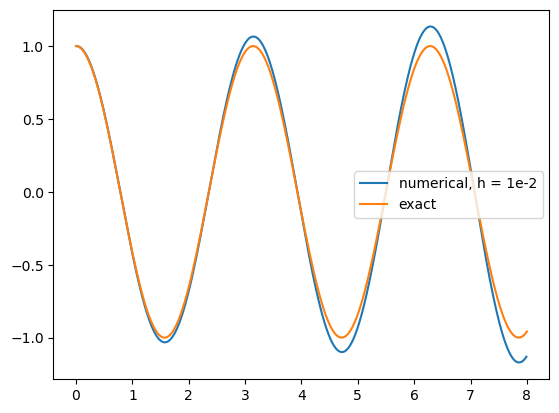

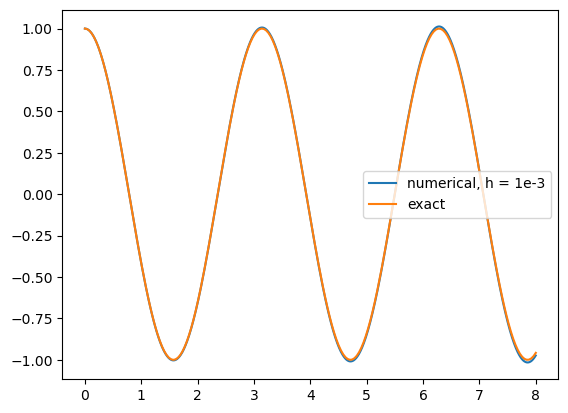

In [8]:
y0 = 1.0
yp0 = 0.0

y0 = 1.0
yp0 = 0.0

w0 = 2.0
g = 0.0

h = 0.1
M = 80
te = np.linspace(0, 8, 200)
ye = np.sin(w0*te + math.pi/2)


yn, t = EulerP(h, y0, yp0, M, g, w0)


plt.plot(t, yn, label = 'numerical, h = 1e-1')
plt.plot(te, ye, label = 'exact')
plt.legend()
plt.show()

h = 0.01
M = 800
te = np.linspace(0, 8, 200)
ye = np.sin(w0*te + math.pi/2)

yn, t = EulerP(h, y0, yp0, M, g, w0)


plt.plot(t, yn, label = 'numerical, h = 1e-2')
plt.plot(te, ye, label = 'exact')
plt.legend()
plt.show()

h = 0.001
M = 8000
te = np.linspace(0, 8, 200)
ye = np.sin(w0*te + math.pi/2)

yn, t = EulerP(h, y0, yp0, M, g, w0)


plt.plot(t, yn, label = 'numerical, h = 1e-3')
plt.plot(te, ye, label = 'exact')
plt.legend()
plt.show()

6. Peut-on améliorer la méthode? Il est possible d'utiliser la correction de la méthode d'Euler, appellée la méthode de Crank-Nicolson, qui se presente de la façon suivante:
$$
\left\{
\begin{array}{l}
\displaystyle y_{j+1}=y_j+h \frac{z_j + z_{j+1}}{2},\\[3mm]
\displaystyle z_{j+1} = z_j - h \frac{f(x_j,y_j,z_j)+f(x_{j+1},y_{j+1},z_{j+1})}{2}.
\end{array}
\right.
$$
Selon la fonction $f$, nous pouvons ou non déterminer les valeurs de $y_{j+1}$ et $z_{j+1}$ explicitement. Dans notre cas, c'est possible. Écrire explicitement la méthode de Crank-Nicolson appliquée à l'équation **(3)**. Mettre d'abord l'équation **(3)** sous la forme d'un système comme précédemment, puis exprimer les itérés des valeurs approchées de $y(x_j)$ et $y'(x_j)$.

> 6. **Votre réponse ici. (Rediger votre reponse en $\LaTeX$)**

7. Implémenter l'algorithme python pour la résolution de **(3)** à l'aide de la méthode de Crank-Nicolson. Refaire les tests pour les mêmes valeurs de $h$ pour lesquelles vous avez observé les problèmes dans la question 5.

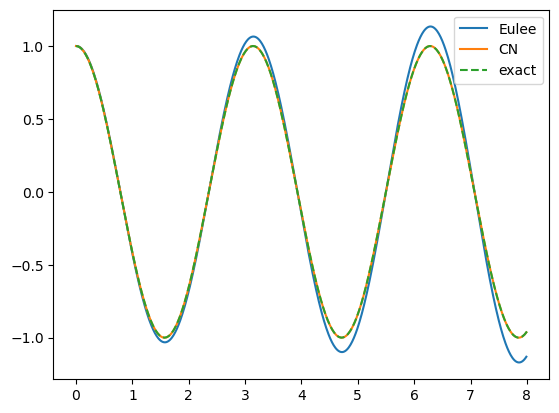

In [16]:
def CrankNicolson(h, y0, yp0, M, g, w0):
    x = np.zeros(M)
    y = np.zeros(M)
    z = np.zeros(M)
    x[0] = 0
    y[0] = y0
    z[0] = yp0
    for j in range(M-1):
        z[j+1] = 1/(1+g*h+w0**2*h**2/4)*((1-g*h-w0**2*h**2/4)*z[j]-w0**2*h*y[j])
        y[j+1] = y[j] + h/2 * (z[j] + z[j+1])
        x[j+1] = (j+1)*h
    return y, x

h = 0.01
M = 800
te = np.linspace(0, 8, 200)
ye = np.sin(w0*te + math.pi/2)

yE, t = EulerP(h, y0, yp0, M, g, w0)
yCN, t = CrankNicolson(h, y0, yp0, M, g, w0)

plt.plot(t, yE, label = 'Eulee')
plt.plot(t, yCN, label = 'CN')
plt.plot(te, ye,'--', label = 'exact')
plt.legend()
plt.show()